In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Input
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical

2025-02-27 18:00:06.511654: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

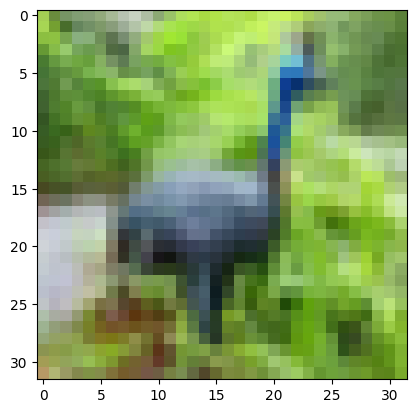

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train0[6])
plt.show()

In [4]:
X_train = X_train0.astype('float32')
X_test = X_test0.astype('float32')
X_train /= 255
X_test /= 255
# Количество классов изображений
nb_classes = 10
Y_train = to_categorical(y_train0, nb_classes)
Y_test = to_categorical(y_test0, nb_classes)

In [ ]:
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes, activation='softmax'))
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

/home/erick/Desktop/Projects/.venv/lib/python3.11/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,842 (6.40 MB)

 Trainable params: 1,676,842 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X_train, Y_train, batch_size=32, epochs=25, validation_split=0.1, shuffle=True)

Epoch 1/25


2025-02-26 22:15:35.637747: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


1406/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8095 - loss: 0.5635

2025-02-26 22:16:45.448995: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61440000 exceeds 10% of free system memory.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 50ms/step - accuracy: 0.8095 - loss: 0.5635 - val_accuracy: 0.7702 - val_loss: 0.7098
Epoch 2/25
 516/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.8063 - loss: 0.5568

KeyboardInterrupt: 

In [7]:
from keras.models import load_model
model = load_model('ImagRec2.keras')
# model.save('ImagRec2.keras')

In [12]:
scores = model.evaluate(X_test, Y_test)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7656 - loss: 0.7288
Точность работы на тестовых данных: 76.25%


In [50]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


prediction:  0 , real:  0


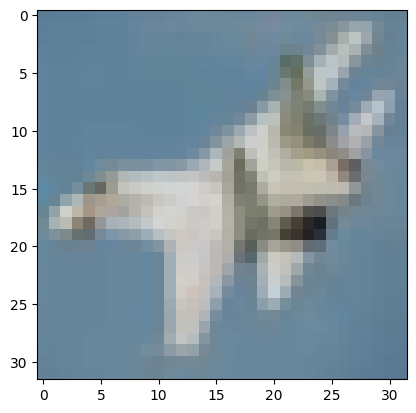

In [54]:
n = 10
im1 = np.argmax(predictions[n])
lab1 = y_test0[n][0]
print('prediction: ', im1, ', real: ', lab1)
plt.imshow(X_test0[n])
plt.show()